In [1]:
# Imports
from shapely.ops import nearest_points
import geopandas as gpd
import pyproj
from shapely.geometry import Polygon
from shapely.ops import transform
import matplotlib.pyplot as plt

In [2]:
def utm_zone(longitude):
    return int(1 + (longitude + 180.0) / 6.0)

# Function to calculate UTM zone from longitude
def utm_zone(longitude):
    return int(1 + (longitude + 180.0) / 6.0)

# Simplified function to convert a distance in degrees to meters
def degrees_to_meters(distance_in_degrees, utm_zone_rectangle):
    # Define the UTM projection string based on the UTM zone
    utm_proj = f"+proj=utm +zone={utm_zone_rectangle} +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
    
    # Create transformers for a small unit distance in degrees (1 degree) to meters
    transformer = pyproj.Transformer.from_crs("EPSG:4326", utm_proj, always_xy=True)
    
    # Convert 1 degree distance to meters (latitude = 0 because we assume small distance near the UTM zone)
    lon1, lat1 = 0, 0
    lon2, lat2 = 1, 0
    
    x1, y1 = transformer.transform(lon1, lat1)
    x2, y2 = transformer.transform(lon2, lat2)
    
    # Calculate the distance in meters for 1 degree of longitude
    meters_per_degree = ((x2 - x1)**2 + (y2 - y1)**2)**0.5
    
    # Convert the input distance in degrees to meters
    distance_in_meters = distance_in_degrees * meters_per_degree
    
    return distance_in_meters

In [3]:
tile_id = 1
rectangle = gpd.read_file('./data/rectangles.geojson').iloc[int(tile_id)-1]
utm_zone_rectangle = utm_zone(rectangle.geometry.centroid.y)
OSM_data = gpd.read_file(f"./output_data/OSM_building_footprints_highways_{tile_id}.gpkg")#.clip(rectangle['geometry'])
roads = OSM_data[(OSM_data.building=='nan')]
# Create a unary union of the road geometries to simplify distance calculation
buildings = OSM_data[(OSM_data.building=='yes')]
road_union = roads.unary_union

In [4]:
gpd.read_file('./data/rectangles.geojson').iloc[16]

n                                                              17
City                                                Kumasi- Ghana
Name                                         Informal subdivision
Latitude                                            6°44'02.59" N
Longitude                                           1°43'54.52" W
Lat                                                   6°44'1.61"N
Lon                                                   1°44'9.71"W
latitude_dd                                              6.733781
longitude_dd                                            -1.736031
geometry        POLYGON ((-1.732406073637579 6.733780555555555...
Name: 16, dtype: object

In [5]:
# Function to calculate the shortest distance to roads
def calculate_distance(building, road_union,utm_zone_rectangle):

    #nearest_geom = nearest_points(crs_transform(building), crs_transform(road_union))[1] #distance to closest road, given the input order
    nearest_geom = nearest_points(building, road_union)[1] #distance to closest road, given the input order
    return degrees_to_meters(building.distance(nearest_geom), utm_zone_rectangle) 

# Apply the distance calculation to each building
buildings.loc[:,'distance_to_road'] = buildings['geometry'].apply(lambda x: x).apply(calculate_distance, road_union=road_union,utm_zone_rectangle=utm_zone_rectangle)

/Users/sarangof/miniconda3/envs/subdivisions/lib/python3.12/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


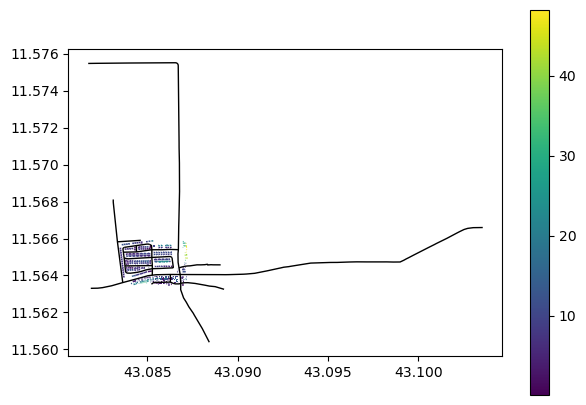

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
buildings.plot(column='distance_to_road', ax=ax, legend=True, cmap='viridis')

# Overlay the roads on the same plot
roads.plot(ax=ax, color='black', linewidth=1)

# Display the plot
plt.show()

In [8]:
buildings['distance_to_road'].describe()

count    353.000000
mean      11.615360
std        9.106434
min        0.098149
25%        6.026136
50%        9.101012
75%       13.649118
max       48.198163
Name: distance_to_road, dtype: float64

In [ ]:
# Read needed files: rectangle, buildings, streets

In [ ]:
# Crop shapes outside of rectangles

In [ ]:
# Calculate relevant geometries or values

# Number of buildings


In [ ]:
# Minimum distance to roads

def calculate_minimum_distance_to_roads():
    # Create a unary union of the road geometries to simplify distance calculation
    road_union = roads.unary_union

    # Function to calculate the shortest distance to roads
    def calculate_distance(building, road_union):
        nearest_geom = nearest_points(building, road_union)[1]
        return building.distance(nearest_geom)

    # Apply the distance calculation to each building
    buildings['distance_to_road'] = buildings['geometry'].apply(calculate_distance, road_union=road_union)


In [ ]:
# Intersections

In [ ]:

# Block polygons

In [ ]:

# City block width

In [ ]:
# Calculate measures


In [ ]:
#1 Share of building footprints that are less than 10-meters away from the nearest road


In [ ]:
#2 Average distance of building footprint centroids to roads


In [ ]:
#3 Density of roads

In [ ]:
#9 Tortuosity index


In [ ]:
#4 Share of 3-way and 4-way intersections 

In [ ]:
#5 Number of 4-way intersections


In [ ]:
#6 Average building footprint orientation of the tile


In [ ]:
#10 Average angle between road segments


In [ ]:
#7 Average block width


In [ ]:
#8 Share of footprints intersected by equidistant line or equivalent segment